# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [4]:
#importing data from municipal elections in Brazil by municipality
import matplotlib.pyplot as plt
import pandas as pd

df_result = pd.read_csv('CEARA-RES-RESULTADO_GERAL_POR_MUNICIPIO.csv', delimiter=';', encoding='ISO 8859-1')

df_result.head()

,Município,Cargo,Número,Nome do Candidato,Nome para Urna,Votos Computados,% Votos Computados,Destinação de Votos,Situação da Totalização,Partido,Partido/Coligação
0,ABAIARA,Prefeito,13,AFONSO TAVARES LEITE,AFONSO TAVARES,3.149,"54,93",Válido,Eleito,PT,PT / PSDB
1,ABAIARA,Vice-Prefeito,13,ANGELO FURTADO SAMPAIO,ANGIM,,,,Eleito,PT,PT / PSDB
2,ABAIARA,Prefeito,15,PEDRO MARCOS BEZERRA MOREIRA,PEDRO MARCOS,2.584,"45,07",Válido,Não eleito,MDB,PSL / PTB / PSD / MDB
3,ABAIARA,Vice-Prefeito,15,CYNTIA NUNES TAVARES,DRA CYNTIA,,,,Não eleito,PSD,PSL / PTB / PSD / MDB
4,ABAIARA,Vereador,55555,FRANCISCO LIVINO DINIZ,FRANCISCO DE TINDÔ,624,"10,81",Válido,Eleito por QP,PSD,PSD


In [5]:
#importing data on gender and age group of voters in municipal elections in Brazil by municipality
import pandas as pd

df_voters = pd.read_csv('CEARA-PERFE-ELEITORES_POR_SEXO_E_FAIXA_ETARIA_POR_MUNICIPIO.csv', delimiter=';')

df_voters.head()

,Faixa Etária,Total,Total.1,Total.2,Total.3,Total.4,Total.5,Total.6,Total.7,16 Anos,...,100 Anos.6,100 Anos.7,Inválida,Inválida.1,Inválida.2,Inválida.3,Inválida.4,Inválida.5,Inválida.6,Inválida.7
0,Sexo,Masculino(M),%M/T,Feminino(F),%F/T,Não Informado(N),%N/T,Total(T),%T/TT,Masculino(M),...,Total(T),%T/TT,Masculino(M),%M/T,Feminino(F),%F/T,Não Informado(N),%N/T,Total(T),%T/TT
1,ABAIARA,3.394,"48,86",3.553,"51,14",0,"0,00",6.947,"0,11",13,...,0,"0,00",0,"0,00",1,"100,00",0,"0,00",1,"0,66"
2,ACARAPE,5.342,"47,19",5.979,"52,81",0,"0,00",11.321,"0,17",33,...,0,"0,00",0,"0,00",0,"0,00",0,"0,00",0,"0,00"
3,ACARAÚ,20.354,"47,14",22.824,"52,86",0,"0,00",43.178,"0,66",80,...,5,"0,18",1,"100,00",0,"0,00",0,"0,00",1,"0,66"
4,ACOPIARA,18.747,"48,44",19.950,"51,55",2,"0,01",38.699,"0,59",54,...,28,"1,01",0,"0,00",0,"0,00",0,"0,00",0,"0,00"


In [6]:
#preparing the data to be used from the sex and age dataset
df_voters = df_voters.unstack().unstack()
df_voters['Faixa Etária'] = df_voters.index
df_voters [''] = df_voters[['Faixa Etária', 0]].agg(' '.join, axis=1)
df_voters.set_index("")
df_voters.drop(columns=[0, 'Faixa Etária'], inplace=True)
df_voters.set_index("", inplace=True)
df_voters.columns = df_voters.iloc[0]
df_voters.drop(df_voters.index[0], inplace=True)
df_voters

Faixa Etária Sexo,ABAIARA,ACARAPE,ACARAÚ,ACOPIARA,AIUABA,ALCÂNTARAS,ALTANEIRA,ALTO SANTO,AMONTADA,ANTONINA DO NORTE,...,TURURU,UBAJARA,UMARI,UMIRIM,URUBURETAMA,URUOCA,VARJOTA,VÁRZEA ALEGRE,VIÇOSA DO CEARÁ,TOTAL(TT)
,,,,,,,,,,,,,,,,,,,,,
Total Masculino(M),3.394,5.342,20.354,18.747,5.683,4.323,2.786,6.222,15.946,3.488,...,6.954,11.487,3.067,7.155,8.002,5.204,8.178,14.128,21.146,3.093.324
Total.1 %M/T,"48,86","47,19","47,14","48,44","49,19","47,91","48,26","49,43","50,28","48,46",...,"50,21","48,05","48,89","49,39","48,75","49,88","49,75","47,21","48,92","47,10"
Total.2 Feminino(F),3.553,5.979,22.824,19.950,5.869,4.700,2.987,6.365,15.770,3.709,...,6.897,12.420,3.206,7.331,8.412,5.229,8.254,15.800,22.080,3.473.629
Total.3 %F/T,"51,14","52,81","52,86","51,55","50,81","52,09","51,74","50,57","49,72","51,53",...,"49,79","51,95","51,11","50,61","51,25","50,12","50,22","52,79","51,08","52,89"
Total.4 Não Informado(N),0,0,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Inválida.3 %F/T,"100,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","100,00","100,00","0,00","0,00","100,00","56,58"
Inválida.4 Não Informado(N),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Inválida.5 %N/T,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,66"


In [7]:
#preparing the data to be used by separating the municipalities in the cariri region by gender and age group
df_new_cariri = df_voters[['BARBALHA', 'CRATO', 'FARIAS BRITO', 'NOVA OLINDA', 'SANTANA DO CARIRI', 'CARIRIAÇU', 'JUAZEIRO DO NORTE', 'MISSÃO VELHA', 'JARDIM']]
df_new_cariri

Faixa Etária Sexo,BARBALHA,CRATO,FARIAS BRITO,NOVA OLINDA,SANTANA DO CARIRI,CARIRIAÇU,JUAZEIRO DO NORTE,MISSÃO VELHA,JARDIM
,,,,,,,,,
Total Masculino(M),20.953,38.966,7.403,5.647,6.076,11.008,79.036,13.082,10.006
Total.1 %M/T,"46,06","45,17","48,12","48,17","48,65","48,19","45,27","47,37","47,66"
Total.2 Feminino(F),24.537,47.301,7.983,6.076,6.414,11.833,95.568,14.534,10.989
Total.3 %F/T,"53,94","54,83","51,88","51,83","51,35","51,81","54,73","52,63","52,34"
Total.4 Não Informado(N),0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
Inválida.3 %F/T,"0,00","75,00","0,00","0,00","0,00","0,00","40,00","0,00","0,00"
Inválida.4 Não Informado(N),0,0,0,0,0,0,0,0,0
Inválida.5 %N/T,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"


In [8]:
#preparing the data to be used by separating the municipalities from the cariri region dataset municipalities
df_cariri = pd.concat([df_result[(df_result['Município'] == 'BARBALHA')], df_result[(df_result['Município'] == 'JARDIM')], df_result[(df_result['Município'] == 'MISSÃO VELHA')], df_result[(df_result['Município'] == 'CRATO')],  df_result[(df_result['Município'] == 'JUAZEIRO DO NORTE')],  df_result[(df_result['Município'] == 'FARIAS BRITO')],  df_result[(df_result['Município'] == 'NOVA OLINDA')],  df_result[(df_result['Município'] == 'SANTANA DO CARIRI')],  df_result[(df_result['Município'] == 'CARIRIAÇU')] ], ignore_index = True)
df_cariri

,Município,Cargo,Número,Nome do Candidato,Nome para Urna,Votos Computados,% Votos Computados,Destinação de Votos,Situação da Totalização,Partido,Partido/Coligação
0,BARBALHA,Prefeito,12,GUILHERME SAMPAIO SARAIVA,DR. GUILHERME,19.900,"53,87",Válido,Eleito,PDT,PSB / PSD / PT / PTB / CIDADANIA / PC do B / P...
1,BARBALHA,Vice-Prefeito,12,EVERTON DE SOUZA GARCIA SIQUEIRA,VEVÉ SIQUEIRA,,,,Eleito,PT,PSB / PSD / PT / PTB / CIDADANIA / PC do B / P...
2,BARBALHA,Prefeito,45,ARGEMIRO SAMPAIO NETO,ARGEMIRO SAMPAIO,17.040,"46,13",Válido,Não eleito,PSDB,PSL / PODE / MDB / PROS / PSDB
3,BARBALHA,Vice-Prefeito,45,JOSÉ ERNANDES OLIVEIRA GARCIA,ERNANDES GARCIA,,,,Não eleito,PROS,PSL / PODE / MDB / PROS / PSDB
4,BARBALHA,Vereador,13777,ODAIR JOSE DE MATOS,PROFESSOR ODAIR MATOS,1.305,"3,50",Válido,Eleito por QP,PT,PT
...,...,...,...,...,...,...,...,...,...,...,...
1149,CARIRIAÇU,Vereador,12444,MARIA CONCEIÇÃO DA SILVA LIMA,GALEGUINHA,62,"0,33",Válido,Suplente,PDT,PDT
1150,CARIRIAÇU,Vereador,55778,MARIA TAMIRIS DA SILVA PEREIRA,TAMY SILVA,50,"0,27",Válido,Suplente,PSD,PSD
1151,CARIRIAÇU,Vereador,55889,FRANCISCA CELIA RIBEIRO,CELINHA,20,"0,11",Válido,Suplente,PSD,PSD
1152,CARIRIAÇU,Vereador,12369,LUCIA CRISTINA DA CUNHA,LUCIA CRISTINA,16,"0,09",Válido,Suplente,PDT,PDT


In [9]:
#Preparing the data on the general candidates' parties
df_cariri_partidos_geral = df_cariri["Partido"]
soma_partidos_geral = df_cariri_partidos_geral.value_counts()
soma_partidos_geral

PDT              126
PT               108
MDB              100
PSB               78
PSL               66
PC do B           64
PODE              59
PSD               56
PROS              52
PMN               51
PTC               47
AVANTE            45
PP                38
REPUBLICANOS      35
PSDB              34
PRTB              30
PL                29
DC                27
REDE              26
PTB               21
CIDADANIA         18
PV                17
PSOL              15
DEM                8
SOLIDARIEDADE      3
PCO                1
Name: Partido, dtype: int64

In [10]:
#removing unelected candidates
df_remove = df_cariri.loc[(df_cariri['Votos Computados'] == ' ') | (df_cariri['Situação da Totalização'] == 'Não eleito')]
ultimo_df = df_cariri.drop(df_remove.index)
ultimo_df
#Preparing the data on the parties of the elected candidates
df_cariri_partidos_eleitos = ultimo_df["Partido"]
soma_partidos = df_cariri_partidos_eleitos.value_counts()
soma_partidos


PDT             115
MDB              95
PSB              72
PT               67
PODE             51
PMN              49
PSD              43
PROS             37
PP               36
PC do B          34
PSDB             32
REPUBLICANOS     30
PRTB             29
PL               28
DC               26
PSL              22
REDE             21
PTB              19
CIDADANIA        18
DEM               7
Name: Partido, dtype: int64

In [11]:
# ratio of the overall number of candidates elected to the overall number of candidates in the party
df_partidos = soma_partidos/soma_partidos_geral
df_partidos = df_partidos.fillna(0)
df_partidos

AVANTE           0.000000
CIDADANIA        1.000000
DC               0.962963
DEM              0.875000
MDB              0.950000
PC do B          0.531250
PCO              0.000000
PDT              0.912698
PL               0.965517
PMN              0.960784
PODE             0.864407
PP               0.947368
PROS             0.711538
PRTB             0.966667
PSB              0.923077
PSD              0.767857
PSDB             0.941176
PSL              0.333333
PSOL             0.000000
PT               0.620370
PTB              0.904762
PTC              0.000000
PV               0.000000
REDE             0.807692
REPUBLICANOS     0.857143
SOLIDARIEDADE    0.000000
Name: Partido, dtype: float64

In [13]:
df_final = pd.DataFrame(df_partidos)
df_final = df_final.rename(columns={'Partido': 'Eleitos/Total'})
df_final['Partido'] = df_final.index
df_final.reset_index(drop=True, inplace=True)
df_final

,Eleitos/Total,Partido
0,0.000000,AVANTE
1,1.000000,CIDADANIA
2,0.962963,DC
3,0.875000,DEM
4,0.950000,MDB
5,0.531250,PC do B
6,0.000000,PCO
7,0.912698,PDT
8,0.965517,PL
9,0.960784,PMN


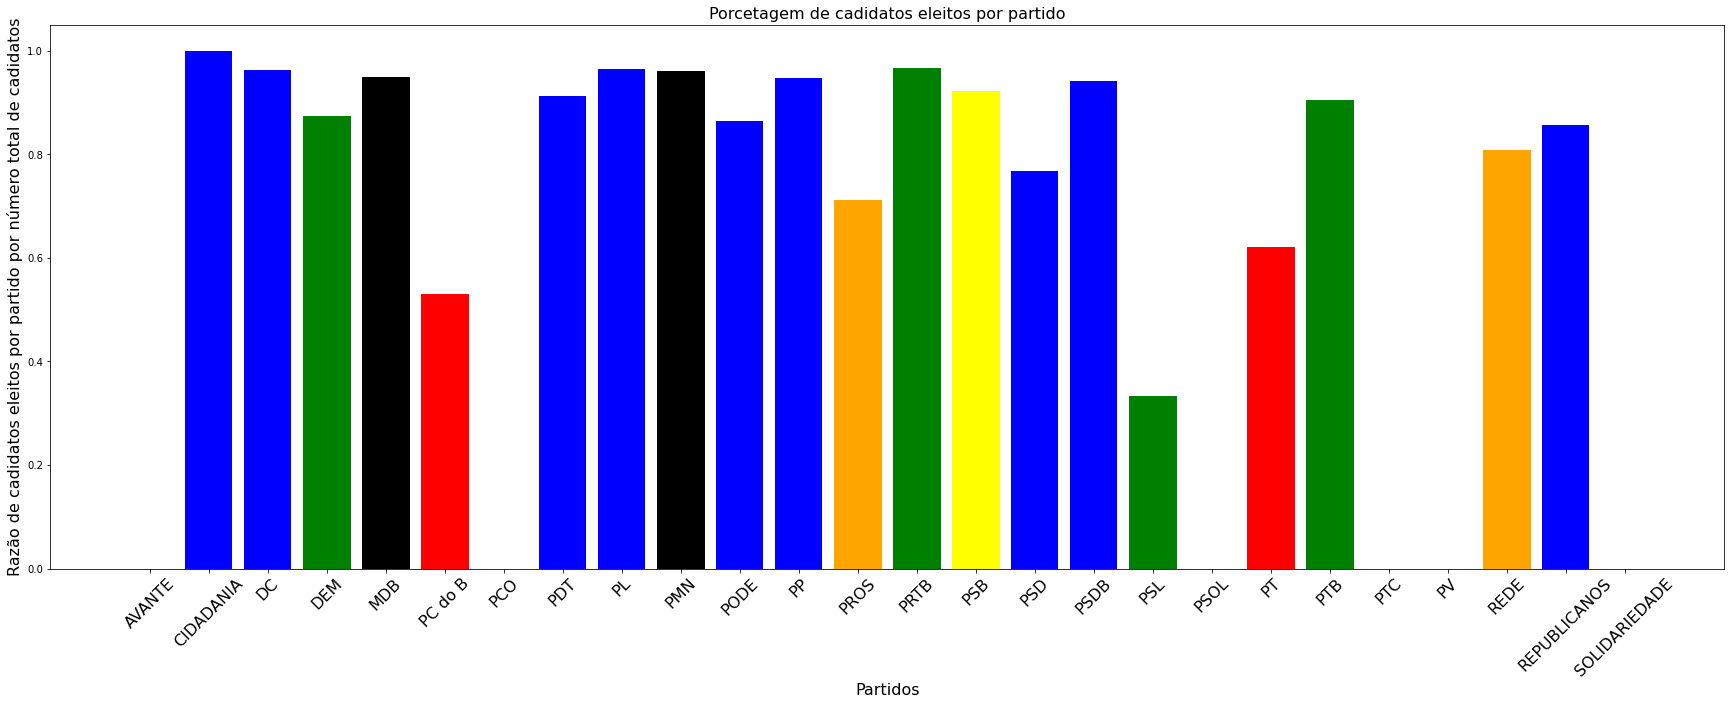

In [14]:
#plotting the graph of the ratio of candidates elected by party to the total number of candidates

plt.figure(figsize=(30, 10))

barlist = plt.bar(df_final['Partido'], df_final['Eleitos/Total'], color="blue")
barlist[0].set_color('orange')
barlist[3].set_color('green')
barlist[4].set_color('black')
barlist[5].set_color('red')
barlist[9].set_color('black')
barlist[12].set_color('orange')
barlist[13].set_color('green')
barlist[14].set_color('yellow')
barlist[17].set_color('green')
barlist[19].set_color('red')
barlist[20].set_color('green')
barlist[23].set_color('orange')


plt.xticks(df_final['Partido'], rotation=45, fontsize = 16)

plt.ylabel('Razão de cadidatos eleitos por partido por número total de cadidatos', fontsize = 16)

plt.xlabel('Partidos',fontsize = 16)

plt.title('Porcetagem de cadidatos eleitos por partido',fontsize = 16)
 
plt.show()

In [20]:
df_new_cariri

Faixa Etária Sexo,BARBALHA,CRATO,FARIAS BRITO,NOVA OLINDA,SANTANA DO CARIRI,CARIRIAÇU,JUAZEIRO DO NORTE,MISSÃO VELHA,JARDIM
,,,,,,,,,
Total Masculino(M),20.953,38.966,7.403,5.647,6.076,11.008,79.036,13.082,10.006
Total.1 %M/T,"46,06","45,17","48,12","48,17","48,65","48,19","45,27","47,37","47,66"
Total.2 Feminino(F),24.537,47.301,7.983,6.076,6.414,11.833,95.568,14.534,10.989
Total.3 %F/T,"53,94","54,83","51,88","51,83","51,35","51,81","54,73","52,63","52,34"
Total.4 Não Informado(N),0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
Inválida.3 %F/T,"0,00","75,00","0,00","0,00","0,00","0,00","40,00","0,00","0,00"
Inválida.4 Não Informado(N),0,0,0,0,0,0,0,0,0
Inválida.5 %N/T,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"


<AxesSubplot: xlabel='Cidade'>

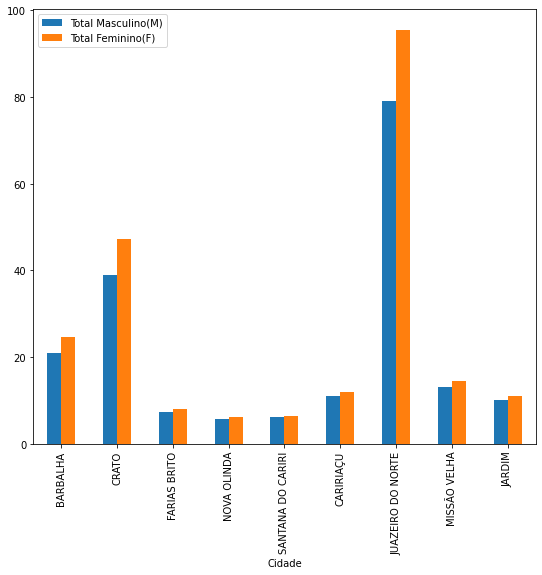

In [53]:
#Which city in cariri has the biggest difference in the male to female electorate
df_masculino_feminino = df_new_cariri.loc[['Total Masculino(M)', 'Total.2 Feminino(F)']]
df_masculino_feminino = df_masculino_feminino.unstack().unstack()
df_masculino_feminino.reset_index(inplace= True)
df_masculino_feminino.rename(columns={'Faixa Etária Sexo': 'Cidade'}, inplace = True)
df_masculino_feminino.rename(columns={'Total.2 Feminino(F)': 'Total Feminino(F)'}, inplace = True)
df_masculino_feminino['Total Masculino(M)']=df_masculino_feminino['Total Masculino(M)'].astype(float)
df_masculino_feminino['Total Feminino(F)']=df_masculino_feminino['Total Feminino(F)'].astype(float)
df_masculino_feminino.plot(x='Cidade', y=['Total Masculino(M)', 'Total Feminino(F)'], kind="bar",figsize=(9,8))